In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv(r"C:\Users\BIGYAJEET\Downloads\Mobile Price Prediction.csv")

In [4]:
data


,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [19]:
data.columns=['Screen_Size','RAM','Storage','Battery_Capacity','Camera_Quality','Price']

In [20]:
data

,Screen_Size,RAM,Storage,Battery_Capacity,Camera_Quality,Price
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [21]:
data.isnull().sum()

Screen_Size         0
RAM                 0
Storage             0
Battery_Capacity    0
Camera_Quality      0
Price               0
dtype: int64

In [22]:
data.dtypes

Screen_Size         float64
RAM                   int64
Storage               int64
Battery_Capacity      int64
Camera_Quality        int64
Price                 int64
dtype: object

In [23]:
for i in data.columns:
    print(i,':','\n',data[i].unique())

Screen_Size : 
 [6.2 6.1 6.5 6.7 6.4 6.  6.3 6.6 5.8 5.7 5.9 6.8 6.9]
RAM : 
 [4 3 6 8]
Storage : 
 [ 64 128 256  32]
Battery_Capacity : 
 [4000 3110 4500 4300 4200 3700 4025 5000 3000 3500 3800 4100 4400 3100
 4600 4700]
Camera_Quality : 
 [48 12 64 40 32 16 24 20]
Price : 
 [500 800 600 700 550 750 450 400 650 900]


<Axes: >

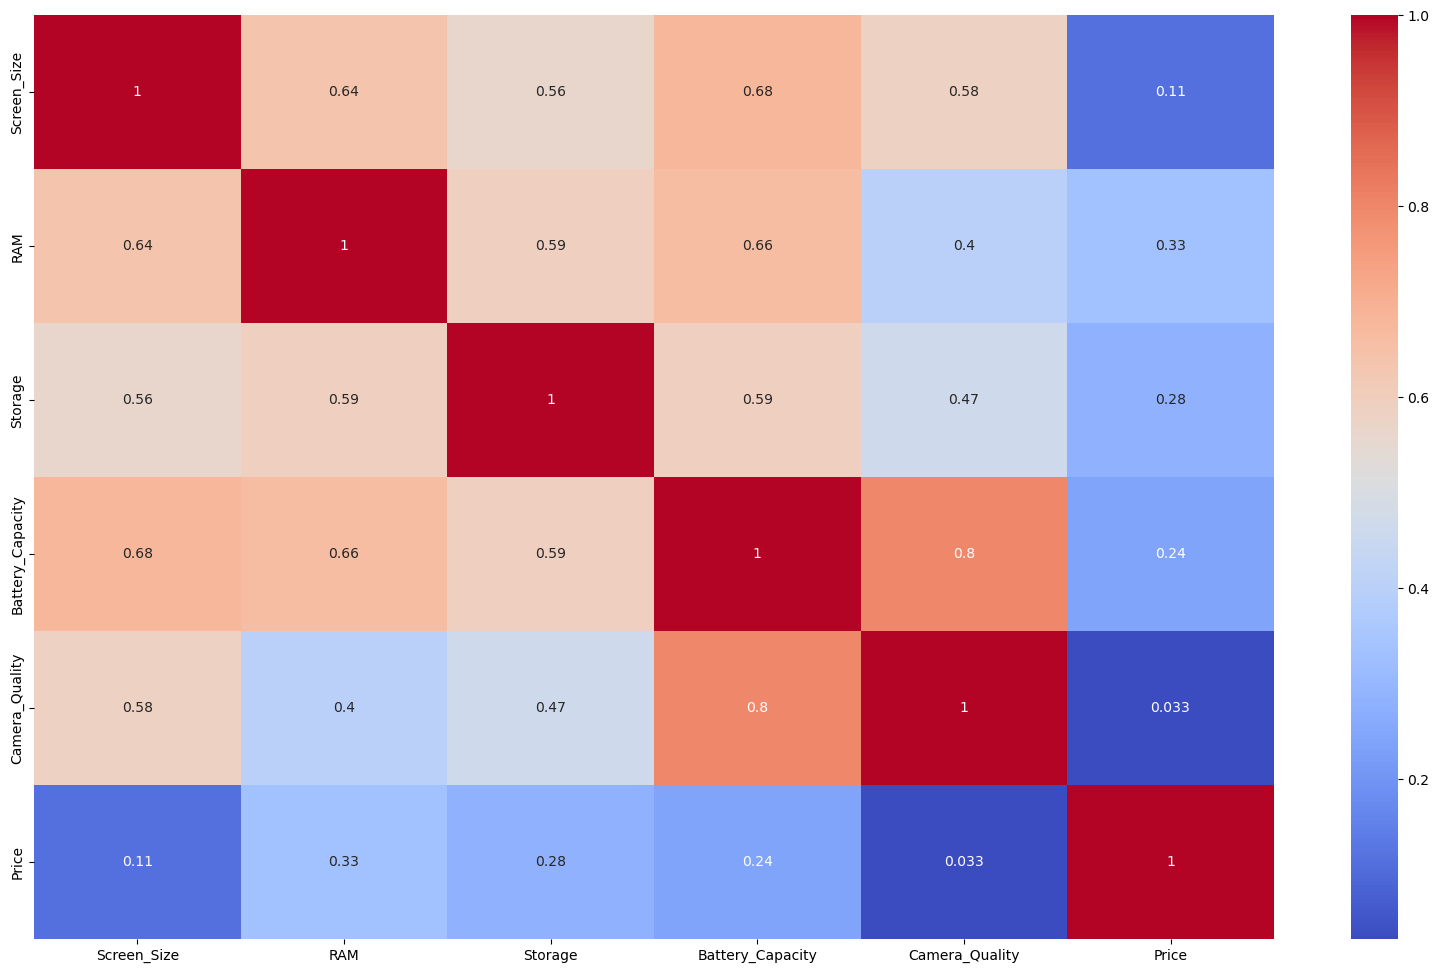

In [24]:
plt.figure(figsize=(20,12))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

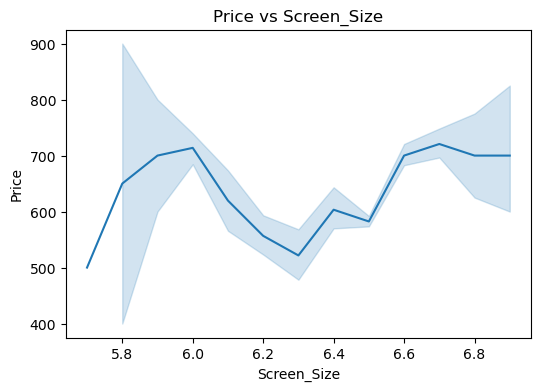

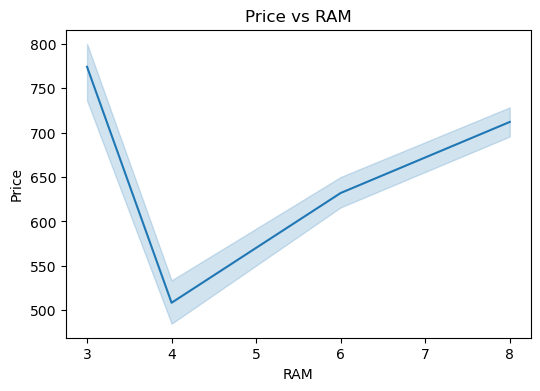

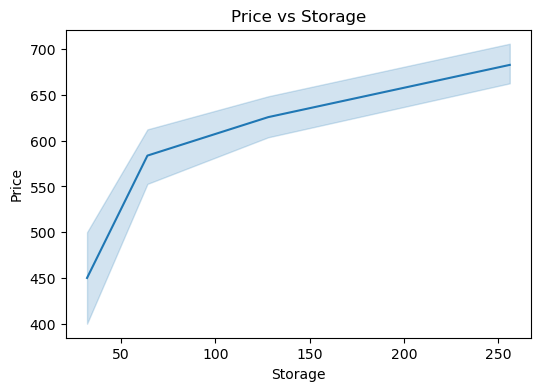

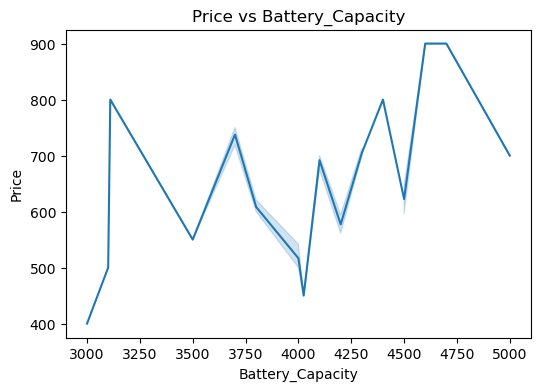

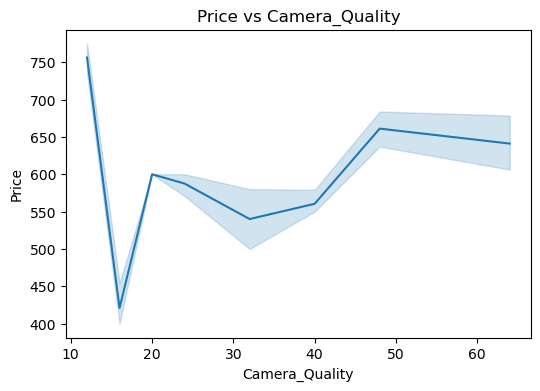

In [26]:
cols =['Screen_Size','RAM','Storage','Battery_Capacity','Camera_Quality']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.lineplot(x=col, y='Price', data=data)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

<Axes: xlabel='RAM', ylabel='Price'>

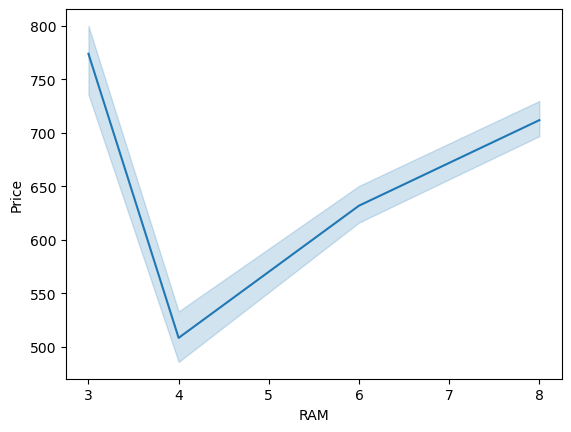

In [27]:
sns.lineplot(data=data,x=data.RAM,y=data.Price)

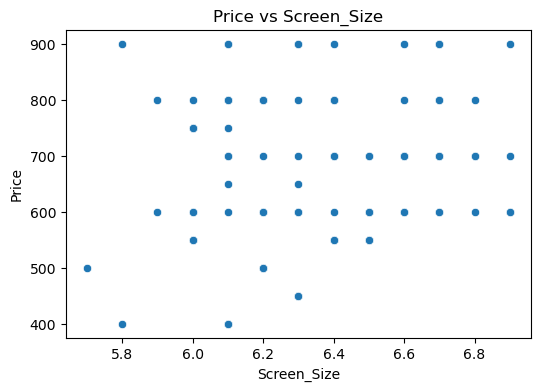

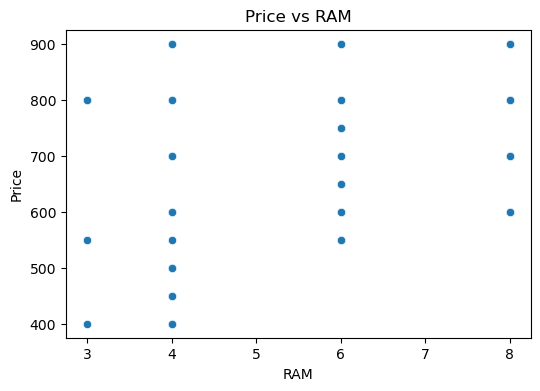

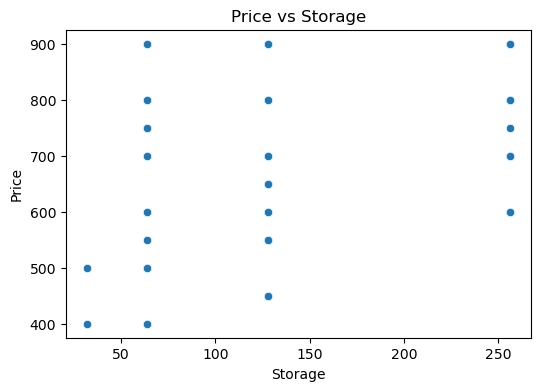

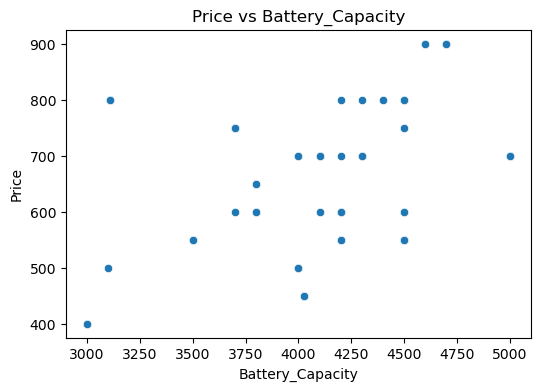

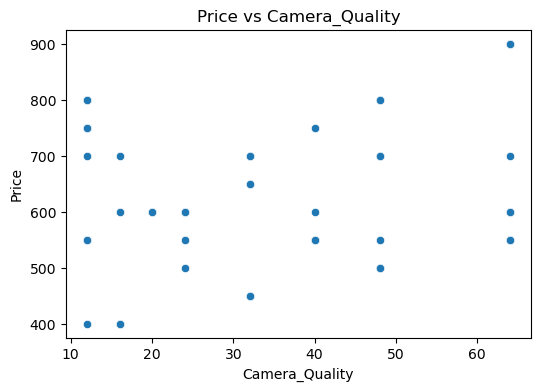

In [28]:
cols =['Screen_Size','RAM','Storage','Battery_Capacity','Camera_Quality']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Price', data=data)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

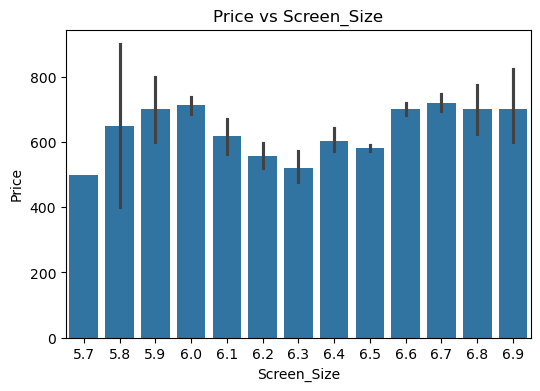

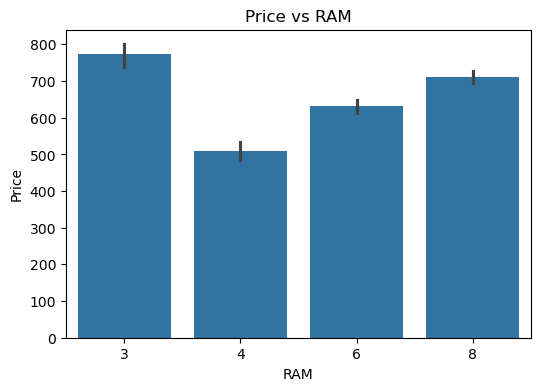

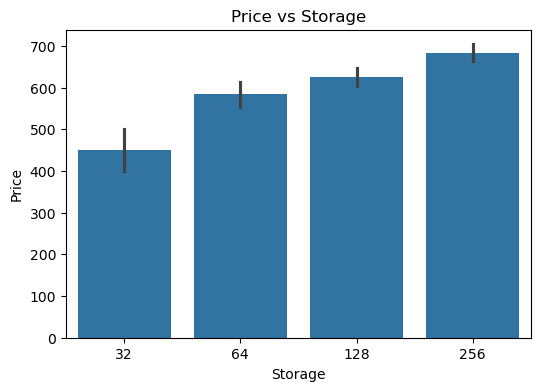

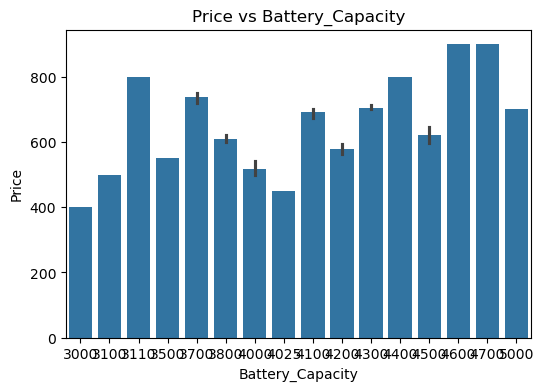

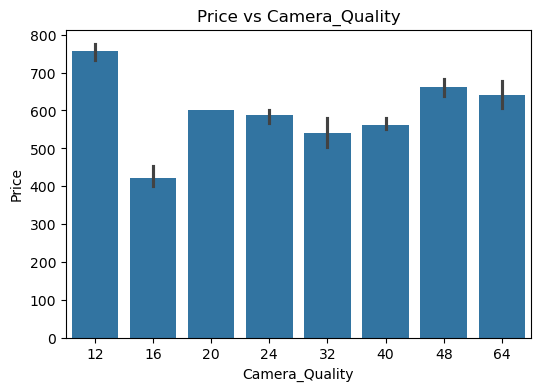

In [30]:
cols =['Screen_Size','RAM','Storage','Battery_Capacity','Camera_Quality']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Price', data=data)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [34]:
ip=data.drop(['Price'],axis=1)

In [35]:
op=data["Price"]

In [36]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.1)


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
sc.fit(xts)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [38]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(xtr,ytr)



LinearRegression()

In [39]:
yp=alg.predict(xts)

In [40]:
print('m is',alg.coef_)
print('c is',alg.intercept_)

m is [-35.55032209  35.21187567  25.69586217  37.14636607 -39.24405044]
c is 614.3566515129895


In [41]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(yts,yp)
print(a)
from sklearn.metrics import r2_score
b=r2_score(yts,yp)
print(b)

15054.00510064523
0.11792938863406854


In [45]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(xtr)
pol_reg=LinearRegression()

pol_reg.fit(x_poly,ytr)
x1=poly.fit_transform(xts)
yp2=pol_reg.predict(x1)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2= mean_squared_error(yts,yp2)
c2= r2_score(yts,yp2)
print(b2,c2)



17004.41111720905 0.0036477861010322243


In [ ]:
;